**Cargar imagen y convertir a RGB**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen (ajusta la ruta si es necesario)
imagen_bgr = cv2.imread('parrot.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

**Convertir RGB → HSV y LAB**

In [3]:
imagen_hsv = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2HSV)
imagen_lab = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2LAB)

# Para visualización con matplotlib
imagen_hsv_rgb = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2RGB)
imagen_lab_rgb = cv2.cvtColor(imagen_lab, cv2.COLOR_LAB2RGB)

**Visualizar RGB, HSV y LAB**


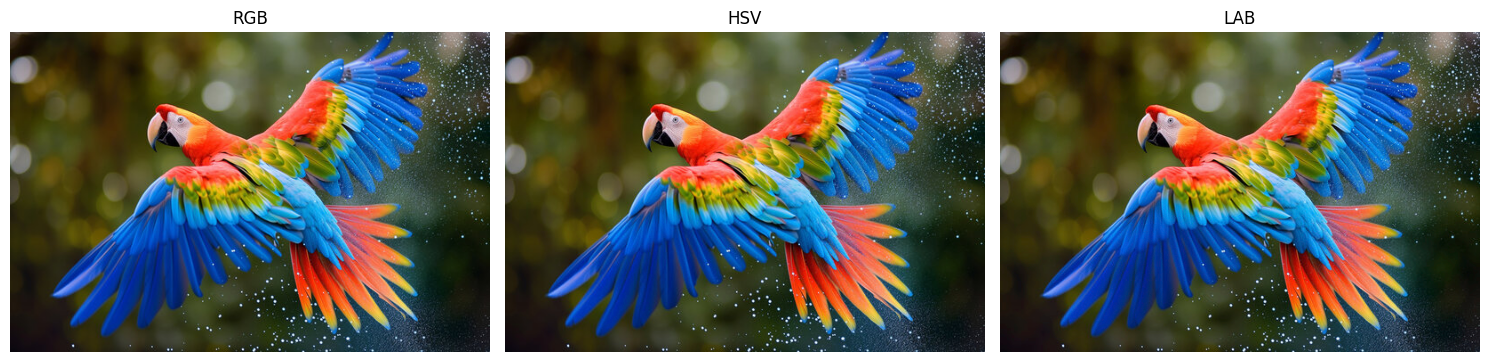

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['RGB', 'HSV', 'LAB']
imagenes = [imagen_rgb, imagen_hsv_rgb, imagen_lab_rgb]

for ax, img, title in zip(axes, imagenes, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Visualizar canales individuales (HSV)**

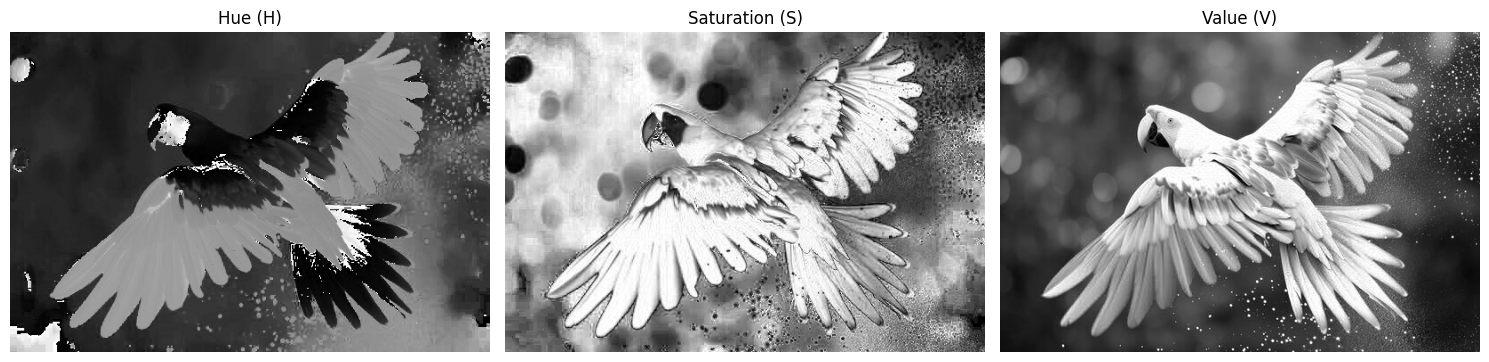

In [6]:
h, s, v = cv2.split(imagen_hsv)
canales = [h, s, v]
nombres = ['Hue (H)', 'Saturation (S)', 'Value (V)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, canal, nombre in zip(axes, canales, nombres):
    ax.imshow(canal, cmap='gray')
    ax.set_title(nombre)
    ax.axis('off')
plt.tight_layout()
plt.show()

**Simulación de daltonismo (protanopía básica)**

No puede identificar el color rojo

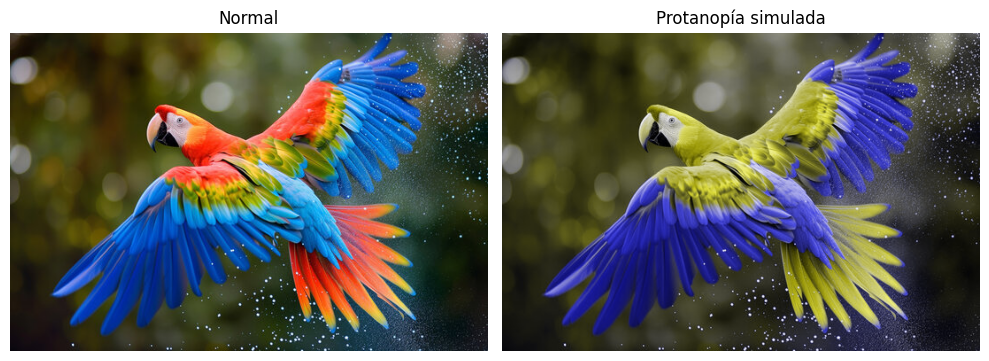

In [7]:
def simular_daltonismo_protanopia(imagen_rgb):
    matriz = np.array([
        [0.567, 0.433, 0],
        [0.558, 0.442, 0],
        [0,     0.242, 0.758]
    ])
    imagen = imagen_rgb.astype(np.float32) / 255
    imagen_dalt = imagen @ matriz.T
    imagen_dalt = np.clip(imagen_dalt, 0, 1)
    return (imagen_dalt * 255).astype(np.uint8)

imagen_dalt = simular_daltonismo_protanopia(imagen_rgb)

# Mostrar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen_rgb)
axes[0].set_title('Normal')
axes[1].imshow(imagen_dalt)
axes[1].set_title('Protanopía simulada')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

**Simulación de baja luz (reducción de brillo y contraste)**

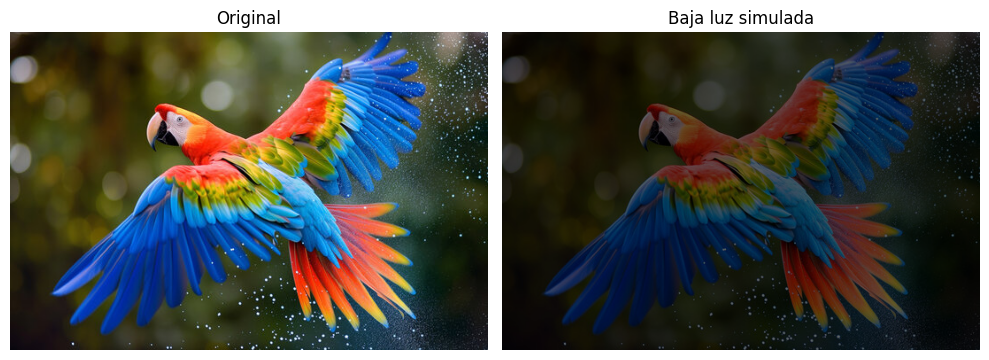

In [8]:
# Reducción de brillo (canal V)
v_bajo = (v * 0.4).astype(np.uint8)
imagen_hsv_baja_luz = cv2.merge([h, s, v_bajo])
imagen_baja_luz = cv2.cvtColor(imagen_hsv_baja_luz, cv2.COLOR_HSV2RGB)

# Mostrar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen_rgb)
axes[0].set_title('Original')
axes[1].imshow(imagen_baja_luz)
axes[1].set_title('Baja luz simulada')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

**Filtros de color personalizados: inversión de matiz**

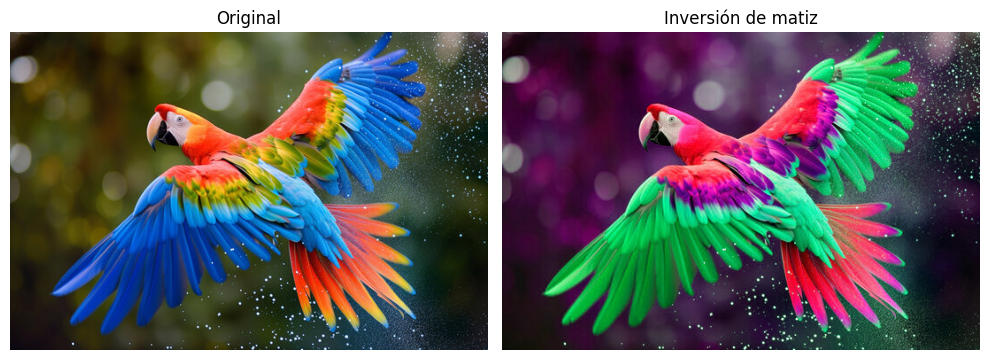

In [9]:
h_invertido = (180 - h) % 180
imagen_hsv_invertida = cv2.merge([h_invertido, s, v])
imagen_invertida = cv2.cvtColor(imagen_hsv_invertida, cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen_rgb)
axes[0].set_title('Original')
axes[1].imshow(imagen_invertida)
axes[1].set_title('Inversión de matiz')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()